c:\Users\harsh\OneDrive\Desktop\UAV_Sworm_Synchronization\Models\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 50, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 23, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 1, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,962 (410.01 KB)

 Trainable params: 104,962 (410.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1: Accuracy = 0.9490, F1 = 0.9702, F2 = 0.9878, MSE = 0.0061, Magnitude = 0.2965
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0241 - val_loss: 0.0061
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 2: Accuracy = 0.9792, F1 = 0.9875, F2 = 0.9900, MSE = 0.0008, Magnitude = 0.3281
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030 - val_loss: 8.0108e-04
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -
Epoch 3: Accuracy = 0.9835, F1 = 0.9900, F2 = 0.9894, MSE = 0.0005, Magnitude = 0.3258
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.6264e-04 - val_loss: 4.6441e-04
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -
Epoch 4: Accuracy = 0.9847, F1 = 0.9908, F2 = 0.9897, MSE = 0.0003, Magnitude = 0.3240
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.4728e-04 - val_loss: 2.7938e-04
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l
Epoch 5: Accuracy = 0.9824, F1 = 0.9894, F2 = 0.9914, MSE = 0.00

Model saved to 'model.h5'


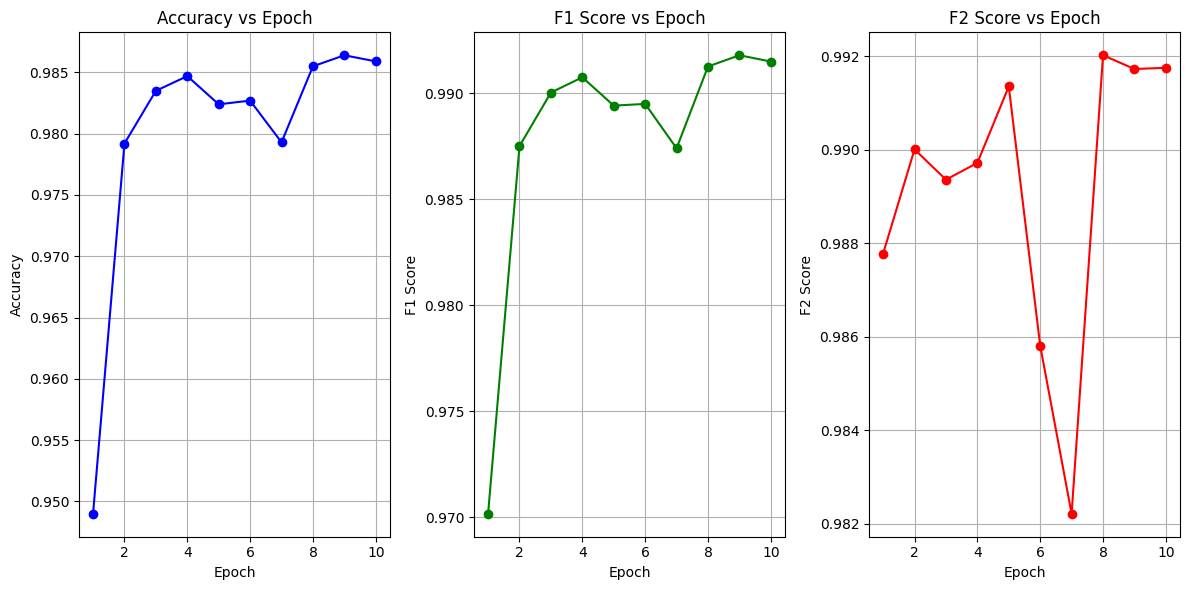

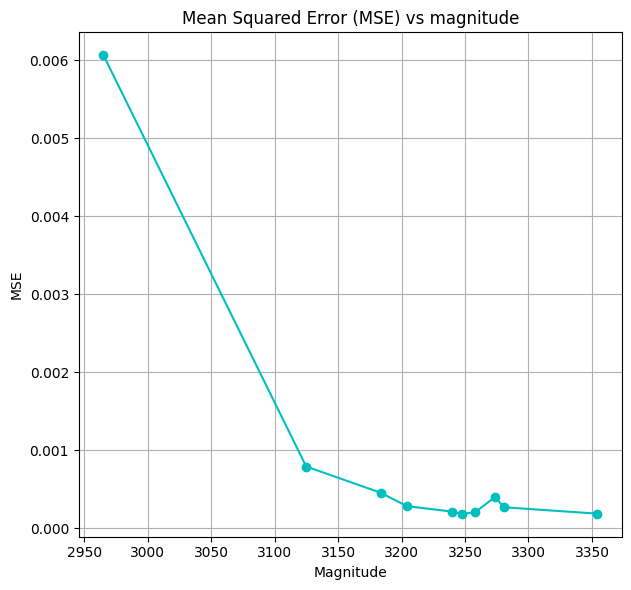

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Split the data into input (X) and output (y)
    X = data.iloc[:, :52].values
    y = data.iloc[:, 52:].values

    # Reshape the input for CNN
    X = X.reshape(X.shape[0], 52, 1, 1)

    return X, y, data

# Function to build the CNN model
def build_cnn_model(input_shape):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Conv2D(64, (3, 1), activation='relu'))
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Conv2D(128, (3, 1), activation='relu'))
    model.add(layers.Flatten())

    # Add dense layers for regression
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))  # 2 outputs for real and imaginary parts (a and b)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Custom callback to calculate and store accuracy, F1, F2, MSE, and magnitude after each epoch
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.epoch_accuracy = []
        self.epoch_f1 = []
        self.epoch_f2 = []
        self.epoch_mse = []
        self.epoch_magnitude = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_train)

        # Categorize outputs (real and imaginary parts) for evaluation
        y_true_cat = categorize_output(self.y_train)
        y_pred_cat = categorize_output(y_pred)

        # Calculate metrics
        accuracy = accuracy_score(y_true_cat, y_pred_cat)
        f1 = f1_score(y_true_cat, y_pred_cat)
        f2 = fbeta_score(y_true_cat, y_pred_cat, beta=2)
        mse = np.mean(np.square(self.y_train - y_pred))  # Calculate MSE

        # Calculate magnitude for each (a, b)
        magnitude = np.mean(np.sqrt(np.square(y_pred[:, 0]) + np.square(y_pred[:, 1])))

        # Store metrics
        self.epoch_accuracy.append(accuracy)
        self.epoch_f1.append(f1)
        self.epoch_f2.append(f2)
        self.epoch_mse.append(mse)
        self.epoch_magnitude.append(magnitude)

        # Print metrics for this epoch
        print(f"Epoch {epoch+1}: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}, F2 = {f2:.4f}, MSE = {mse:.4f}, Magnitude = {magnitude:.4f}")

# Function to categorize the output (small vs large values)
def categorize_output(y, threshold=0.1):
    categories = []
    for real, imag in y:
        if abs(real) < threshold and abs(imag) < threshold:
            categories.append(0)  # Small
        else:
            categories.append(1)  # Large
    return np.array(categories)

# Function to plot accuracy, F1, F2 scores, MSE, and magnitude vs epoch
def plot_metrics(metrics_callback):
    epochs = range(1, len(metrics_callback.epoch_accuracy) + 1)
    metrics_callback.epoch_magnitude.sort()

    # Plot Accuracy, F1 Score, and F2 Score vs Epoch
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, metrics_callback.epoch_accuracy, marker='o', color='b', label='Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(epochs, metrics_callback.epoch_f1, marker='o', color='g', label='F1 Score')
    plt.title('F1 Score vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(epochs, metrics_callback.epoch_f2, marker='o', color='r', label='F2 Score')
    plt.title('F2 Score vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('F2 Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot MSE and Magnitude of a and b
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot([value * 10000 for value in metrics_callback.epoch_magnitude], metrics_callback.epoch_mse, marker='o', color='c', label='MSE')
    plt.title('Mean Squared Error (MSE) vs magnitude')
    plt.xlabel('Magnitude')
    plt.ylabel('MSE')
    plt.grid(True)


    plt.tight_layout()
    plt.show()

# Main function to run the entire process
def main(file_path):
    # Load and preprocess data
    X, y, data = load_and_preprocess_data(file_path)

    # Build the model
    model = build_cnn_model((52, 1, 1))

    # Print model summary
    model.summary()

    # Define the callback to calculate metrics after each epoch
    metrics_callback = MetricsCallback(X, y)

    # Train the model with the callback
    model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[metrics_callback])

    # Save the trained model to a file
    model.save('model.h5')
    print("Model saved to 'model.h5'")

    # Plot metrics after training
    plot_metrics(metrics_callback)

# Run the process with the given dataset
main('Dataset-1.csv')


In [4]:
# Load the saved model
model = tf.keras.models.load_model('model.h5')

# Preprocess the new data
new_data = np.array([[0.8432567026933011,0.8593184805880408,0.8492800383667163,0.8492800383667163,0.8402392957882098,0.8636763098337783,0.8492800383667163,0.8492800383667163,0.8943007449989938,0.19236149455273485,0.8492800383667163,0.16250232458484296,0.13627964952816454,0.8007679452442718,0.16250232458484296,0.8492800383667163,0.8963233985142228,0.21961132825524712,0.8492800383667163,0.16250232458484296,0.93122481863128,0.25314881233049696,0.8492800383667163,0.16250232458484296,0.06799743336951711,0.7676781010145877,0.16250232458484296,0.8492800383667163,0.7447527097140642,0.9303591877350573,0.8492800383667163,0.8492800383667163,0.7010080864089242,0.9294688394859725,0.8492800383667163,0.8492800383667163,0.33542998052149686,0.06822109378050352,0.16250232458484296,0.16250232458484296,0.6967002359463391,0.9418948872878814,0.8492800383667163,0.8492800383667163,0.030752940357524492,0.6662174051343016,0.16250232458484296,0.8492800383667163,0.34871643365636756,0.037973784170194945,0.16250232458484296,0.16250232458484296]])
new_data = new_data.reshape(new_data.shape[0], 52, 1, 1)

# Predict using the model
predictions = model.predict(new_data)
print("Predictions for new data:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predictions for new data: [[0.42435488 0.2132258 ]]


In [ ]:
# Add dataset directly by uploding it


#below diagram is made by GPT about what Architechtural Diagram means
import numpy as np


learning_rates = 10**np.arange(-5, -10, -0.7)
print(learning_rates)

[1.00000000e-05 1.99526231e-06 3.98107171e-07 7.94328235e-08
 1.58489319e-08 3.16227766e-09 6.30957344e-10 1.25892541e-10]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 50, 1, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 23, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 11, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 1, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,962 (410.01 KB)

 Trainable params: 104,962 (410.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1: Accuracy = 0.9461, F1 = 0.9684, F2 = 0.9839
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0343 - val_loss: 0.0145
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Epoch 2: Accuracy = 0.9767, F1 = 0.9860, F2 = 0.9882
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0110 - val_loss: 0.0011
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 3: Accuracy = 0.9781, F1 = 0.9869, F2 = 0.9919
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0012 - val_loss: 9.9144e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 4: Accuracy = 0.9784, F1 = 0.9869, F2 = 0.9821
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 5.7159e-04 - val_loss: 3.1536e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Epoch 5: Accuracy = 0.9711, F1 = 0.9823, F2 = 0.9737
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 3.9799e-04 - val_loss: 5.2284e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 6: Accuracy = 0.9

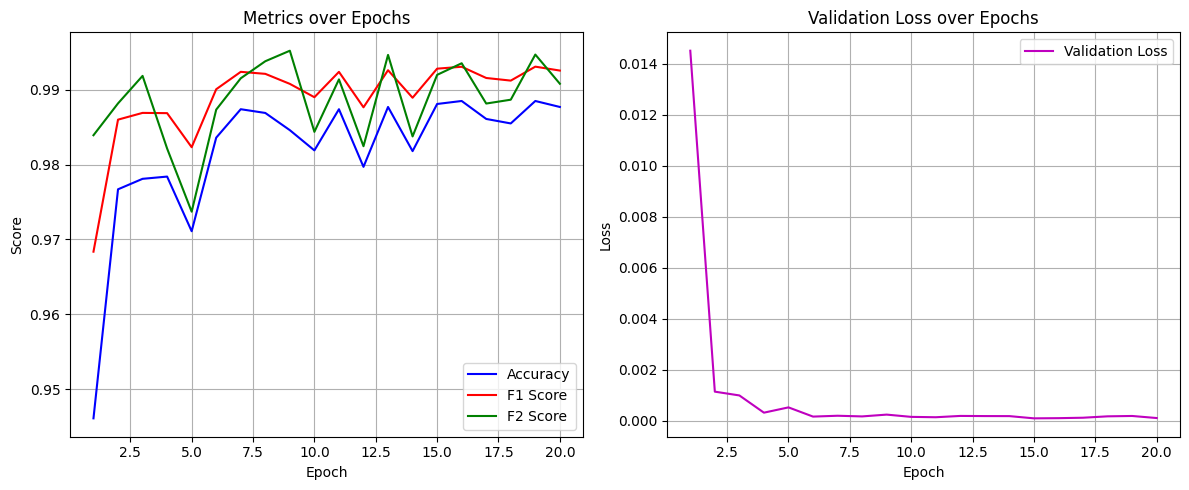

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Split the data into input (X) and output (y)
    X = data.iloc[:, :52].values
    y = data.iloc[:, 52:].values

    # Reshape the input for CNN
    X = X.reshape(X.shape[0], 52, 1, 1)

    return X, y, data

# Function to build the CNN model
def build_cnn_model(input_shape):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Conv2D(64, (3, 1), activation='relu'))
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Conv2D(128, (3, 1), activation='relu'))
    model.add(layers.Flatten())

    # Add dense layers for regression
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))  # 2 outputs for real and imaginary parts

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Custom callback to store and plot metrics
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.accuracy = []
        self.f1 = []
        self.f2 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_train)
        y_true_cat = categorize_output(self.y_train)
        y_pred_cat = categorize_output(y_pred)

        acc = accuracy_score(y_true_cat, y_pred_cat)
        f1 = f1_score(y_true_cat, y_pred_cat)
        f2 = fbeta_score(y_true_cat, y_pred_cat, beta=2)

        self.accuracy.append(acc)
        self.f1.append(f1)
        self.f2.append(f2)

        print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}, F1 = {f1:.4f}, F2 = {f2:.4f}")

    def plot_metrics(self, history):
        epochs = range(1, len(history.history['val_loss']) + 1)

        plt.figure(figsize=(12, 5))

        # Plot accuracy, F1, and F2
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.accuracy, 'b', label='Accuracy')
        plt.plot(epochs, self.f1, 'r', label='F1 Score')
        plt.plot(epochs, self.f2, 'g', label='F2 Score')
        plt.title('Metrics over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        # Plot val_loss
        plt.subplot(1, 2, 2)
        plt.plot(epochs, history.history['val_loss'], 'm', label='Validation Loss')
        plt.title('Validation Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Function to categorize the output (small vs large values)
def categorize_output(y, threshold=0.1):
    categories = []
    for real, imag in y:
        if abs(real) < threshold and abs(imag) < threshold:
            categories.append(0)  # Small
        else:
            categories.append(1)  # Large
    return np.array(categories)


def evaluate_model(y_true, y_pred, threshold=0.1):
    # Categorize true and predicted outputs
    y_true_cat = categorize_output(y_true, threshold)
    y_pred_cat = categorize_output(y_pred, threshold)

    # Calculate metrics
    accuracy = accuracy_score(y_true_cat, y_pred_cat)
    f1 = f1_score(y_true_cat, y_pred_cat)
    f2 = fbeta_score(y_true_cat, y_pred_cat, beta=2)

    # Return the metrics as a dictionary for further use
    return {"Accuracy": accuracy, "F1 Score": f1, "F2 Score": f2}


# Main function to run the entire process
def main(file_path):
    # Load and preprocess data
    X, y, data = load_and_preprocess_data(file_path)

    # Build the model
    model = build_cnn_model((52, 1, 1))
    #Model Summary
    model.summary()

    # Define the callback to calculate metrics after each epoch
    metrics_callback = MetricsCallback(X, y)

    # Train the model with the callback
    history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[metrics_callback])

    # Evaluate the model performance and print metrics
    y_pred = model.predict(X)
    metrics = evaluate_model(y, y_pred)
    metrics_df = pd.DataFrame([metrics])
    print(metrics_df)

    # Plot metrics
    metrics_callback.plot_metrics(history)

# Run the process with the given dataset
main('Dataset-1.csv')

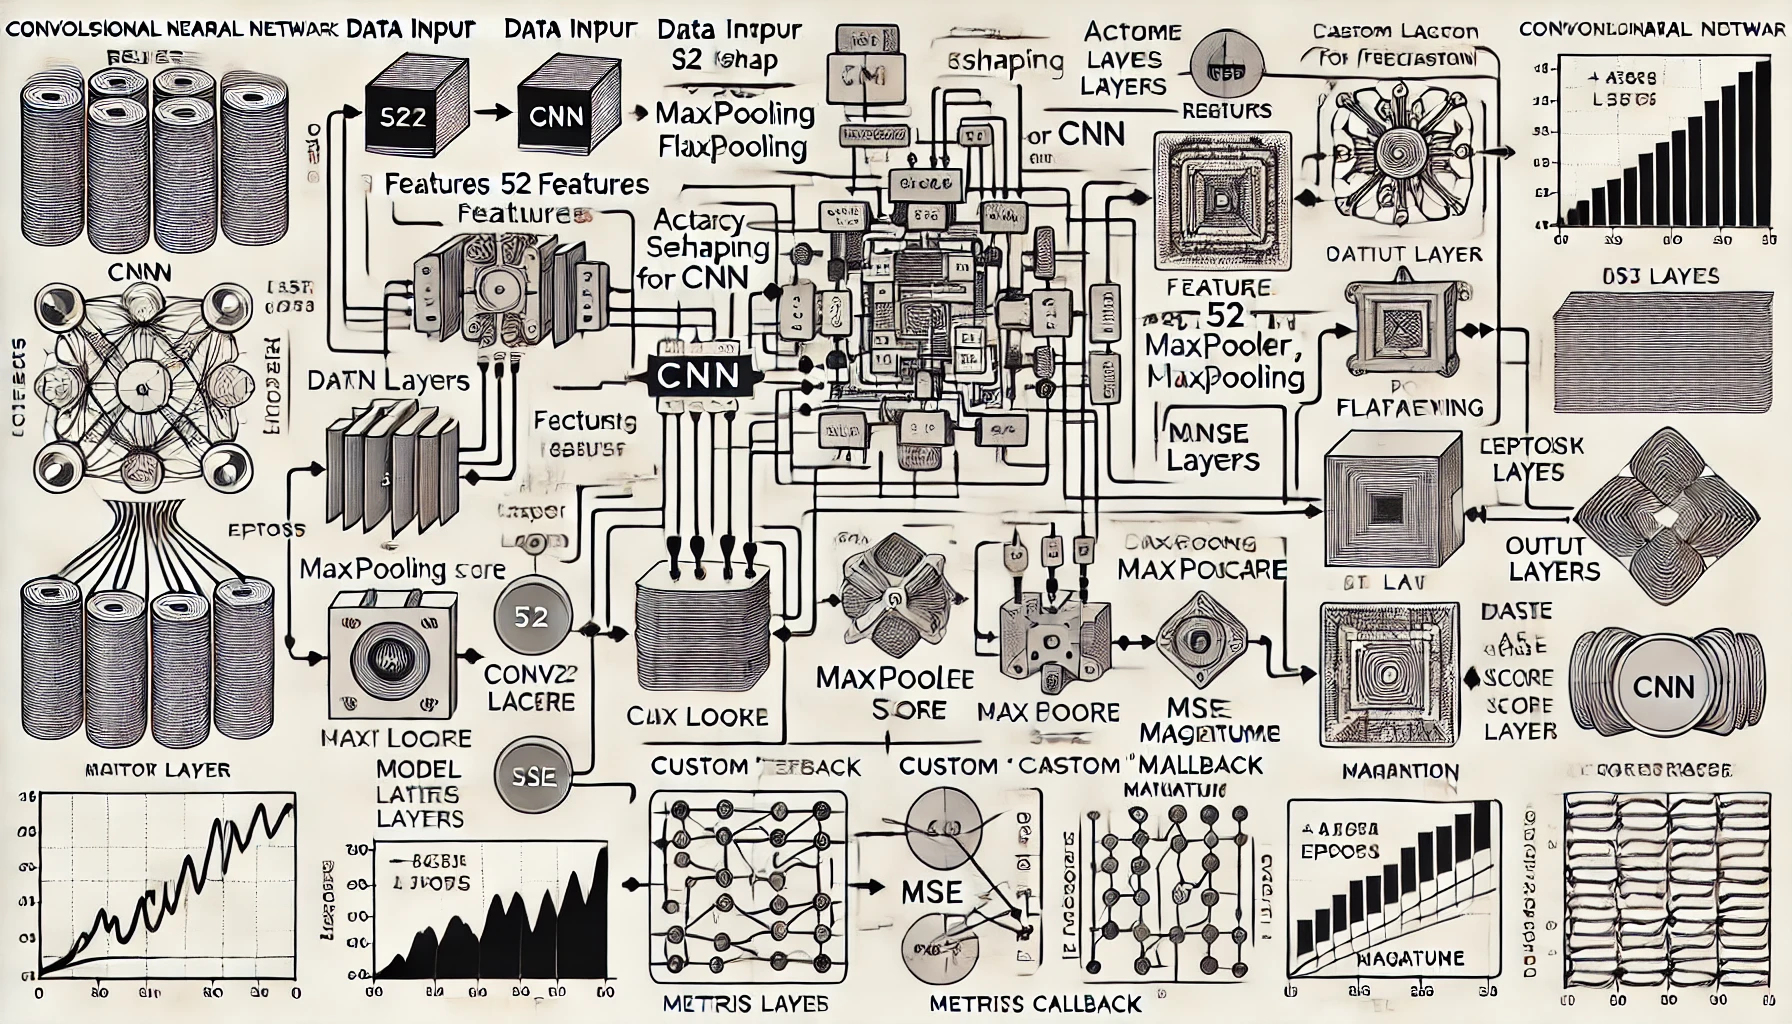